# Analyzes Def-to-Items cluster similarity within each Source-Definition

- Create group-by of unique Source-Definition-Target with average sim metrics 
- 

# Setup Environment

## Set Notebook Parameters

In [1]:
# use gDrive if you previously saved train_data, etc.
# otherwise, use pre-generated data from repos (Default)
USE_GDRIVE = False

# if using gDrive, then the path to the checkpoint folder must be specified.
# After mounting your gDrive, view /content/drive and "copy path" to FOLDER, like...
CP_PATH = '/content/drive/MyDrive/CVA-SBERT-Analyses/20221119-183356'

# save analysis plots if customized
SAVE_PLOT = False

## Import various packages


In [2]:
import pandas as pd
import numpy as np

## Clone CVA-SBERT GitHub or mount gDrive

In [6]:
import os.path
from os import path
from time import strftime, localtime
from google.colab import drive

if USE_GDRIVE:
    drive.mount('/content/drive')           # mount gDrive

else:
    !git clone https://github.com/Hackathorn/CVA-SBERT  # clone repo
    CP_PATH = '/content/CVA-SBERT/data/post_setup_data'

fatal: destination path 'CVA-SBERT' already exists and is not an empty directory.


## Read CVA datasets into ```train_data``` dataframe

In [20]:
train_data = pd.read_csv(CP_PATH+'/train_data.csv')
train_data

,DataId,SourceId,Target,Definition,Item,Cos_Sim,Euc_Sim
0,0,2978,1,People whose past behavior is consistent with ...,Have any of your current or previous partners ...,0.183756,1.277688
1,1,1056,0,Facilitation from work to school.,I enjoy being a student on this campus.,0.292208,1.189783
2,3,1015,0,Employees? sense of belongingness at work.,Helps others when it is clear their workload i...,0.322255,1.164255
3,4,2988,0,How attracted members were to the crew and the...,Managers rate each crew (low performance/high ...,0.446235,1.052393
4,7,3130,0,Things Manny didn?t do.,Did Manny tear the book while he was reading it?,0.565577,0.932119
...,...,...,...,...,...,...,...
23030,28070,12341,0,The extent to which reputations were observabl...,The project required close working relationshi...,0.213506,1.254188
23031,28071,12822,1,How characteristic each of the attractiveness ...,Wise.,0.147961,1.305403
23032,28072,3350,1,Participants' explanations for why the seller ...,The buyer is persuasive,0.569600,0.927793
23033,28074,2361,1,Newcomers? belief that good alternative work e...,To what extent have other co-workers influence...,0.447036,1.051631


In [22]:
train_data.sort_values(by = ['SourceId', 'Definition', 'Item', 'Target'])

,DataId,SourceId,Target,Definition,Item,Cos_Sim,Euc_Sim
10944,13361,317,1,Fits well into a bureaucracy because he has pr...,Conforms.,0.295002,1.187432
10998,13424,317,1,Fits well into a bureaucracy because he has pr...,Enjoys detailed work.,0.195786,1.268238
22166,27003,317,1,Fits well into a bureaucracy because he has pr...,"Fits readily into ""the system.""",0.340720,1.148286
7185,8757,317,1,Fits well into a bureaucracy because he has pr...,Holds back ideas until obviously needed.,0.161294,1.295150
14810,18006,317,1,Fits well into a bureaucracy because he has pr...,Is a steady plodder.,0.158429,1.297359
...,...,...,...,...,...,...,...
18434,22448,14046,0,"The emotional experience of anger, frustration...",Almost all the promises made by my employer du...,0.451701,1.047186
9395,11467,14046,1,"The emotional experience of anger, frustration...",I feel betrayed by the organization.,0.361069,1.130426
16126,19643,14046,1,"The emotional experience of anger, frustration...",I feel that the organization has violated the ...,0.233476,1.238163
4980,6079,14046,1,The extent to which each commitment was fulfil...,Almost all the promises made by my employer du...,0.546662,0.952195


In [23]:
train_data

,DataId,SourceId,Target,Definition,Item,Cos_Sim,Euc_Sim
0,0,2978,1,People whose past behavior is consistent with ...,Have any of your current or previous partners ...,0.183756,1.277688
1,1,1056,0,Facilitation from work to school.,I enjoy being a student on this campus.,0.292208,1.189783
2,3,1015,0,Employees? sense of belongingness at work.,Helps others when it is clear their workload i...,0.322255,1.164255
3,4,2988,0,How attracted members were to the crew and the...,Managers rate each crew (low performance/high ...,0.446235,1.052393
4,7,3130,0,Things Manny didn?t do.,Did Manny tear the book while he was reading it?,0.565577,0.932119
...,...,...,...,...,...,...,...
23030,28070,12341,0,The extent to which reputations were observabl...,The project required close working relationshi...,0.213506,1.254188
23031,28071,12822,1,How characteristic each of the attractiveness ...,Wise.,0.147961,1.305403
23032,28072,3350,1,Participants' explanations for why the seller ...,The buyer is persuasive,0.569600,0.927793
23033,28074,2361,1,Newcomers? belief that good alternative work e...,To what extent have other co-workers influence...,0.447036,1.051631


RESULTS...
- DataId should match with original CSV dataset rows   # TODO - check!
- TODO - more comments on above

# Find mean Cos_Sim for Items by Source-Definition-Target 

- Group Items by Source-Definition-Target
- Calculate mean Cos_Sim for Target = 0/1

In [24]:
# DefItem_clusters = train_data.groupby(['SourceId', 'Definition', 'Target', 'Item'])['Cos_Sim'].count()
DefItem_clusters = train_data.groupby(['SourceId', 'Definition', 'Target'])['Item'].count()
DefItem_clusters

SourceId  Definition                                                                                     Target
317       Fits well into a bureaucracy because he has proper respect for authority and rules.            1         18
          Precise, reliable, and disciplined.                                                            1         18
353       The first people to adopt the new technology.                                                  1          1
354       A result of hands-on experience gained during training.                                        0          9
                                                                                                         1          4
                                                                                                                   ..
14032     We measured manager's voice to their supervisor using the manager's general manager.           0          3
                                                              

In [25]:
DefItem_clusters = train_data.groupby(['SourceId', 'Definition', 'Target'], as_index=False)['Cos_Sim', 'Euc_Sim'].mean()
DefItem_clusters

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,SourceId,Definition,Target,Cos_Sim,Euc_Sim
0,317,Fits well into a bureaucracy because he has pr...,1,0.260213,1.212985
1,317,"Precise, reliable, and disciplined.",1,0.312180,1.170302
2,353,The first people to adopt the new technology.,1,0.288779,1.192662
3,354,A result of hands-on experience gained during ...,0,0.166185,1.290405
4,354,A result of hands-on experience gained during ...,1,0.061682,1.367960
...,...,...,...,...,...
4213,14032,We measured manager's voice to their superviso...,0,0.226383,1.238673
4214,14032,We measured manager's voice to their superviso...,1,0.113301,1.329695
4215,14046,"The emotional experience of anger, frustration...",0,0.451701,1.047186
4216,14046,"The emotional experience of anger, frustration...",1,0.297272,1.184294


RESULTS....
- Ignore Euc_Sim b/c high coorelated with Cos_Sim

Plot histogram of each DefItem_cluster split by Target 0/1

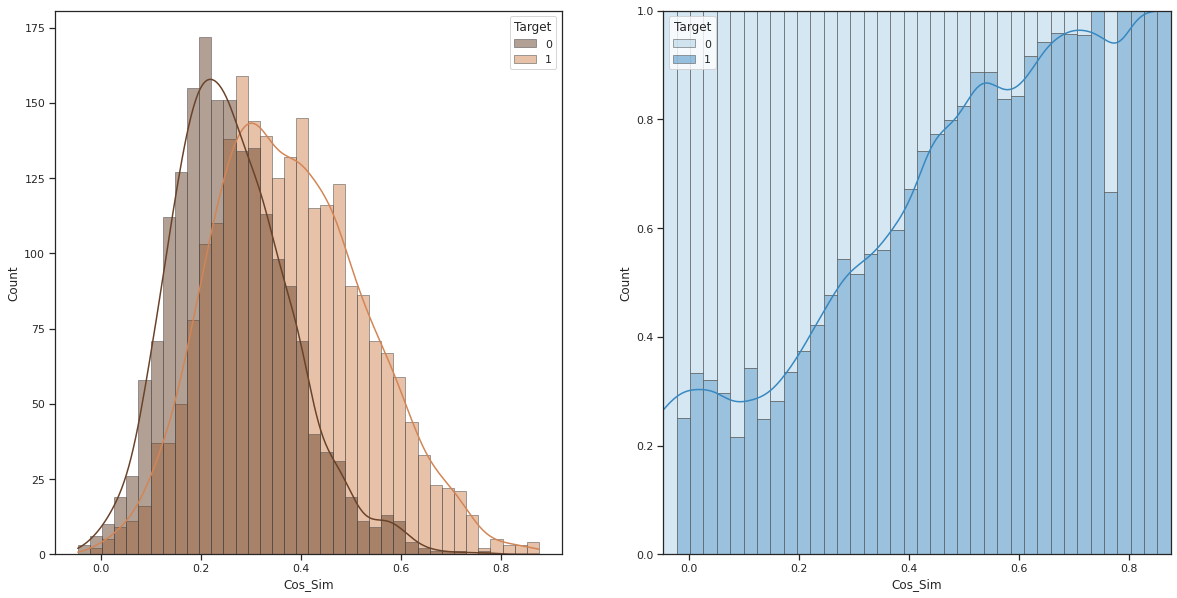

In [27]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")
f, axs = plt.subplots(1, 2, figsize=(20, 10))
# sns.despine(f)    # eliminate top & right border

sns.histplot(
    DefItem_clusters,
    x="Cos_Sim", hue="Target",
    kde=True, 
    multiple="layer",   # layer, dodge, stack, fill
    palette="copper",    # Blues, light:m_r, copper, flare
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
    ax=axs[0],
)
# axs[0].set_yscale("log")
sns.histplot(
    DefItem_clusters,
    x="Cos_Sim", hue="Target",
    kde=True, 
    multiple="fill",    # layer, dodge, stack, fill
    palette="Blues",    # Blues, light:m_r, copper, flare
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
    ax=axs[1],
)

RESULTS...
- Same as distributions of individual Items, as shown in SimDim notebook
- Wonder if Sources for Sim > 0.6 & Target=1 were consistently high scoring
- Likewise, Sources for Sim < 0.1 & Target=1 were low scoring

## Find average Cos_Sim by just Source for Target = 1

In [32]:
# Ignore Target = 0 DefItem_clusters
df = DefItem_clusters.loc[DefItem_clusters['Target'] == 1]

# groupby SourceId & calculate mean Cos_Sim
df = df.groupby(['SourceId'], as_index=False)['Cos_Sim'].mean()


# DefItem_clusters = train_data.groupby(['SourceId', 'Definition', 'Target'], as_index=False)['Cos_Sim', 'Euc_Sim'].mean()


df

,SourceId,Cos_Sim
0,317,0.286196
1,353,0.288779
2,354,0.170132
3,417,0.237644
4,875,0.468755
...,...,...
662,14020,0.382236
663,14023,0.263655
664,14027,0.437796
665,14032,0.281899


RESULTS...
- Some insights........